In [7]:
# prepare a desition tree model using the gini index as the critaria on the iris.csv data set

In [4]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv("Iris.csv")

In [7]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
x=df.drop(['Species','Id'],axis=1)

In [9]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
y=df["Species"]

In [11]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [12]:
model=DecisionTreeClassifier(criterion='gini') # if we don't specify a criteria for splitting the root  node ,by default the criteria used is entropy

In [13]:
model

DecisionTreeClassifier()

In [14]:
# initialize a dictionary to  hold gini impurities for each feature 
gini_impurities ={}

In [15]:
# this is not a part of the decision tree model but(important in interview)
import numpy as np

In [16]:
#original arry
arr = np.array([1,2,3,4,5,6])
print('original array shape:',arr.shape)

original array shape: (6,)


In [17]:
#reshape array(important)
reshaped_arr = arr.reshape(-1,1)  #we use -1,1 is convert all rows to columns when we dont no how many rows are there
print('Reshaped array shape:', reshaped_arr.shape) #-1 is rows and 1 is colums

Reshaped array shape: (6, 1)


In [18]:
# reshape command is used to reshape the numpy array or we can convert a single dimension array to a multi dimention array 
print(reshaped_arr) #while reshaping a single-D arr,please make sure the no of rows and colums shall be the factor of total no presnt in the single-D array

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


In [19]:
 # loop through each feature
for i in range(x.shape[1]):
    # fit the classifier with only the current feature 
    model=model.fit (x.iloc[:, i].values.reshape(-1,1),y)
    prob =model.predict_proba(x.iloc[:,i].values.reshape(-1,1))
    gini_impurities[i]=1-(prob[:, 0]**2 + prob[:, 1]**2 +prob[:, 2]**2).sum()

In [20]:
# when we are writing the simple colon(:) than that means it takes the entire row and entire column
#a[1][2] the 1 is row and 2 is column we write the one digit of 1 row 2 column digit
#a[:,2] is all the row of 2nd column
x.shape

(150, 4)

In [21]:
x.shape[1]

4

In [22]:
#loc is used for custom index(indexing defined by user) i loc is used for internal indexing used by numpy
#no matter what the user indexing are iloc indexing always startes from 0

In [23]:
# find the feature with the lowest gini  impurity
best_feature = min(gini_impurities, key=gini_impurities.get)  # get function is extract the keys
print(f"Best Feature: {best_feature}")

Best Feature: 2


<function matplotlib.pyplot.show(close=None, block=None)>

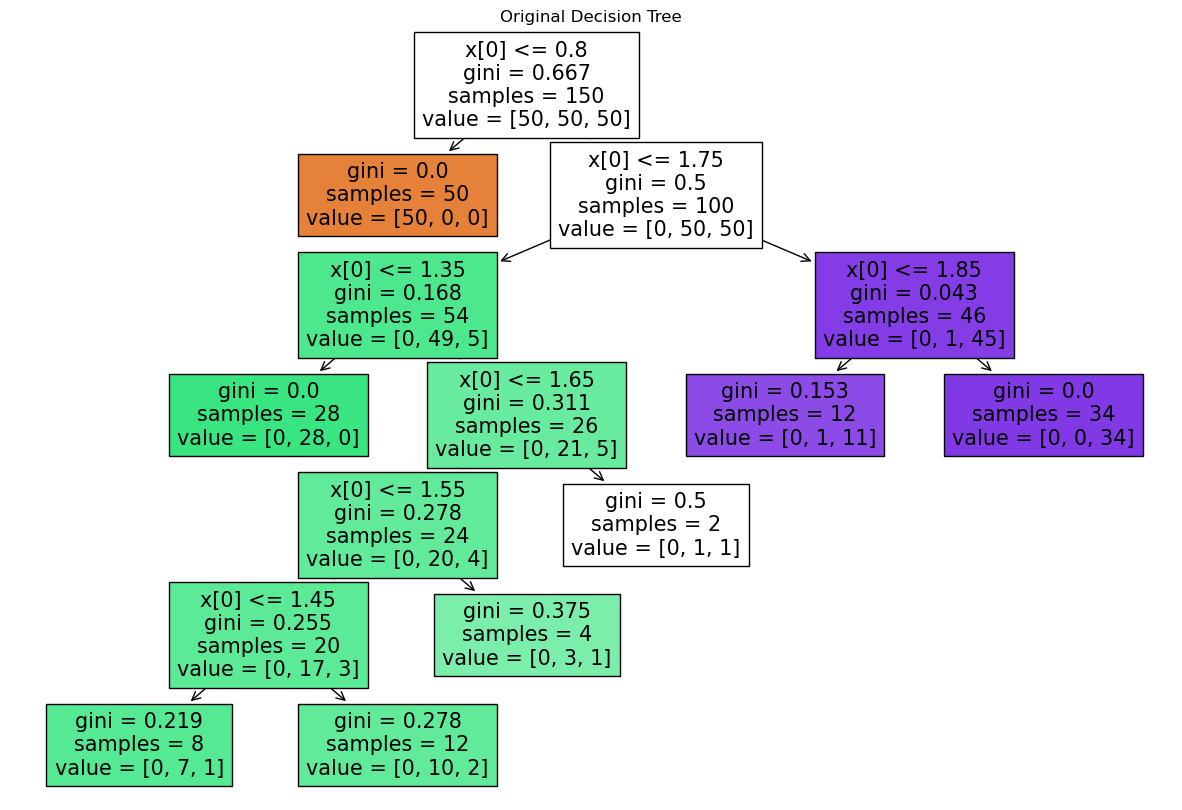

In [25]:
#plot original tree
plt.figure(figsize=(15,10))
plot_tree(model, filled=True)
plt.title("Original Decision Tree")
plt.show